## Probando el twitter tokenizer de nltk

In [4]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)

### Obtengo textos a partir de un archivo csv

In [5]:
import csv
s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
tknzr.tokenize(s0)

prov = 'chaco'

texts = []
with open('train/train_{}.csv'.format(prov),'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        texts.append(row[2]) 
       

## Ejemplo de uso de tokenizador

In [28]:
print texts[300]
for w in tknzr.tokenize(texts[0]):
    print w

Feliz navidad para todos.. Mucho amor y felicidad para el mundo entero..
ni
siquiera
un
fernet
?
?


In [22]:
i = 0
stop = 100
palabras = []
for word,c in sorted(noestan.items() ,key=lambda x:x[1],reverse= True):
    palabras.append(word)
    if i == stop:
        break
    i += 1
for p in palabras:
    print p
    

jajaja
jaja
jajajaja
q
jajajajaja
asi
dia
teres
jajaj
jajajaj
jajajajajaja
we
i
river
hdp
lpm
x
pessoas
finde
breñas
the
and
seu
xq
facebook
unfollowers
xd
via
you
charata
siii
by
aca
jajajajajajaja
twitter
queres
c
despues
dias
ahi
nose
tw
nooo
m
tambien
jajajajaj
people
new
followers
veni
follower
chau
followed
promo
wpp
one
estan
foi
ok
amooo
pa
sabado
stats
s
n
mmm
qe
love
nas
weee
just
automatically
checked
peli
paaa
todavia
free
p
recien
unfollowed
messi
t
vamo
my
goool
posted
yaaa
photo
rt
hs
super
b
jajajajajajajaja
dormirrr
musica
l
pibes
gym
bue
pibe
unico


## Veo que palabras están en el diccionario y cuáles no [Usando pyenchant]

In [4]:
import enchant
d = enchant.Dict("es_AR")
noestan = {}
estan = {}
words  = {}
for text in texts:
    for w in tknzr.tokenize(text):
        if w.isalpha():
            if words.has_key(w):
                words[w] += 1
            else:
                words[w] = 1
#estan = sum([d.check(w) for w in words])
for word,cant in words.iteritems():
    if not(d.check(word)):
        noestan[word] = cant
    else:
        estan[word] = cant
        


cant_estan = sum([c for c in estan.values()])
cant_noestan = sum([c for c in noestan.values()])
print 'Cantidades totales: ',cant_estan,cant_noestan,cant_estan/float(cant_estan+cant_noestan)
print 'Cantidades unicas: ' ,len(estan),len(noestan), len(estan)/float(len(estan)+len(noestan))
#i = 0
#for w,c in sorted(noestan.items() ,key=lambda x:x[1],reverse= True):
#    if c < 10:
#        break
#    i +=1
#    print i,w,c

Cantidades totales:  1590930 246428 0.865879159097
Cantidades unicas:  30081 41711 0.419002117228


In [13]:
import enchant, difflib
i = 0

for word,c in sorted(noestan.items() ,key=lambda x:x[1],reverse= True):
    dicc = {}
    a = set(d.suggest(word))
    for b in a:
        tmp = difflib.SequenceMatcher(None, word, b).ratio();
        dicc[tmp] = b
    print word,dicc
    if i == 100:
            break
    i += 1

jajaja {0.7272727272727273: u'ajada', 0.5454545454545454: u'ahaja'}
jaja {0.75: u'jaca', 0.8888888888888888: u'jauja', 0.8571428571428571: u'aja'}
jajajaja {0.42857142857142855: u'alhaja', 0.4: u'agasaja'}
q {0.0: u'y'}
jajajajaja {0.42105263157894735: u'agasajara'}
asi {0.3333333333333333: u'isa', 0.6666666666666666: u'as\xed', 0.8: u'si', 0.8571428571428571: u'asir'}
dia {0.6666666666666666: u'ida', 0.8: u'da', 0.8571428571428571: u'diga'}
teres {0.8888888888888888: u'tres', 0.6: u'retes', 0.9090909090909091: u'\xe9teres', 0.8: u'tetes'}
jajaj {0.75: u'aja'}
jajajaj {0.5: u'ahaja', 0.6666666666666666: u'ajada', 0.46153846153846156: u'alhaja'}
jajajajajaja {0.36363636363636365: u'atarrajara'}
we {0.5: u'se', 0.6666666666666666: u'e', 0.8: u'web'}
i {0.0: u'u', 0.6666666666666666: u'id'}
river {0.7272727272727273: u'Rivero', 0.6: u'veril', 0.9090909090909091: u'rivera', 0.8: u'rever'}
hdp {0.0: u'', 0.5714285714285714: u'dpto'}
lpm {0.0: u'', 0.5: u'milpa'}
x {0.0: u'y', 0.666666666666

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
def plot(canti,dic):
    plt.title("Frecuencia de Palabras")
    plt.xlabel("Palabras")
    plt.ylabel("Frecuencia")

    index = np.arange(len(dic.keys()))
    bar_width = 0.35


    cant = canti
    valores = sorted(dic.values(),reverse=True)
    claves = sorted(dic, key=dic.get,reverse=True)

    opacity = 0.4
    plt.xticks(index + bar_width, claves[:cant], size=10, rotation="vertical")
    plt.bar(range(cant),valores[:cant],alpha=opacity,color='b',)
    plt.tight_layout()
    plt.show()


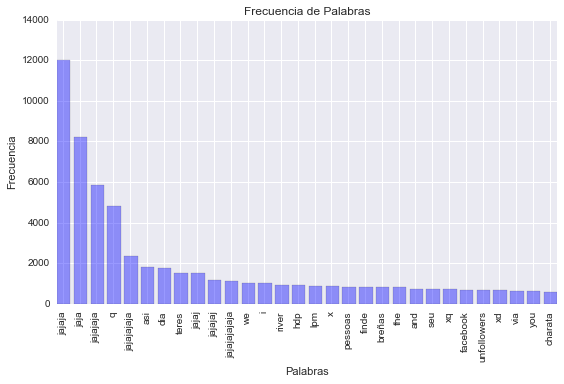

In [51]:
plot(30,noestan)

## Probando TextBlob

In [30]:
from textblob import TextBlob

In [33]:
 wiki = TextBlob("El hombre escribio un libro.")

In [35]:
print wiki.tags
print wiki.noun_phrases
print wiki.words

[('El', u'NNP'), ('hombre', u'NN'), ('escribio', u'NN'), ('un', u'JJ'), ('libro', u'NN')]
['el', u'hombre escribio un libro']
['El', 'hombre', 'escribio', 'un', 'libro']


In [7]:
print len(texts)

240348


## Tokenizo todos los textos y los guardo en /corpus

In [55]:

from apps import *
import csv

from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)

for prov in argentina:
    with open('train/train_{}.csv'.format(prov),'rb') as csvfile,\
         open('corpus/{}.txt'.format(prov),'wb') as txt:
        reader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in reader:        
            texto = [w for w in tknzr.tokenize(row[2]) if w.isalpha()]
            txt.write(' '.join(texto).encode('utf-8')+'\n')
            

In [24]:
from nltk.book import FreqDist
fdist =  FreqDist(texts)
#fdist.most_common()

## Cantidad de Palabras por provincia

In [62]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = './corpus'
wordlists = PlaintextCorpusReader(corpus_root, '.*')
for prov in argentina:
    print 'Cantidad de palabras de ' + prov + ' ' + str(len(wordlists.words('{}.txt'.format(prov))))

Cantidad de palabras de jujuy 1592417
Cantidad de palabras de catamarca 1705541
Cantidad de palabras de sanjuan 1663667
Cantidad de palabras de salta 1759072
Cantidad de palabras de rionegro 1723614
Cantidad de palabras de lapampa 1928663
Cantidad de palabras de chaco 1837358
Cantidad de palabras de mendoza 1831277
Cantidad de palabras de buenosaires 1715515
Cantidad de palabras de entrerios 1849271
Cantidad de palabras de chubut 1842906
Cantidad de palabras de santacruz 1656996
Cantidad de palabras de neuquen 1666735
Cantidad de palabras de misiones 1817548
Cantidad de palabras de corrientes 1765563
Cantidad de palabras de formosa 1803015
Cantidad de palabras de santafe 2016652
Cantidad de palabras de santiago 1765440
Cantidad de palabras de cordoba 1964669
Cantidad de palabras de larioja 1783175
Cantidad de palabras de tierradelfuego 1801015
Cantidad de palabras de tucuman 1701225
Cantidad de palabras de sanluis 1761500


## Viendo la función concordance

In [88]:
import nltk.corpus  
from nltk.text import Text 
with open('corpus/buenosaires.txt','rU') as fi:
    txt = fi.read().decode('utf8')
    bsas = Text(txt.split())
print (bsas.concordance('ddhh',100,20))

Displaying 4 of 4 matches:
ndo al progresismo trucho en temas de educacion ddhh y varios que hace imperdible a la mayoría de lo
es lo peor que pudo hacer este tipo pasarse los ddhh y el dolor de esas mujeres por el culo esto ya 
l calidad institucional y vigencia plena de los ddhh en una sociedad justa san martin seamos libres 
 bue me rio un rato de lo que se ponen si a los ddhh pobre me borro por las caritas las queria proba
None


In [159]:
import pandas as pd
from pandas.io.json import json_normalize
import json
words = {}
for prov in argentina:
    with open('./train/train_{}_dict.json'.format(prov), 'r') as f:
         words[prov] = json.load(f)

df = pd.DataFrame(words)
#df = json_normalize(data)

#df = pd.read_json('./train/train_{}_dict.json'.format('buenosaires'),typ='series')
#df.names=['Palabra','Cantidad']
#print df.sort('Cantidad',ascending=0)
#print df.head(20)

354


In [167]:
print df.sort_values(by='buenosaires',ascending=0).head(100)

         buenosaires  catamarca    chaco   chubut  cordoba  corrientes  \
que          72146.0    66683.0  78682.0  73211.0  79401.0     76376.0   
de           56068.0    53368.0  55678.0  60492.0  64266.0     58586.0   
a            46217.0    42606.0  46032.0  50648.0  51926.0     44225.0   
me           44489.0    37289.0  41517.0  45741.0  52082.0     39233.0   
la           43886.0    40138.0  42812.0  46792.0  48883.0     41063.0   
no           40427.0    37700.0  43628.0  39896.0  46201.0     40882.0   
y            36394.0    31599.0  35066.0  36593.0  40955.0     36268.0   
el           33385.0    31458.0  31170.0  35169.0  37160.0     32427.0   
en           24658.0    25615.0  22784.0  28052.0  26457.0     23782.0   
te           18745.0    21167.0  23954.0  18444.0  21151.0     21639.0   
se           18023.0    16932.0  19035.0  19362.0  19964.0     17763.0   
un           17054.0    15085.0  17156.0  16982.0  18157.0     17007.0   
lo           16793.0    15644.0  17927